In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline

In [ ]:
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 1.6 MB/s 
     |████████████████████████████████| 1.1 MB 35.2 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=d2193481911012ddf528d463b8d5331ae9f64535c91b598f171fd615e6d57741
  Stored in directory: /root/.cache/pip/wheels/a9/3a/67/06a8950e053725912e6a8c42c4a3a241410f6487b8402542ea
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55513 sha256=a4a80e0a8aa8d524d8421437db4957964fd707acaaf2ca57d0866e752898ab1e
  Stored in directory: /root/.cache/pip/wheels/1c/63/3a/29954bca1a27ba100ed8c27973a78cb71b43dc67aed62e80c3
Successfully built umap-learn pynndescent


In [ ]:
metadata = pd.read_csv('interesting_metadata_for_GBM_vs_normal.csv')
metadata.head()

,Unnamed: 0,title,geo_accession,status,submission_date,last_update_date,type,channel_count,source_name_ch1,organism_ch1,...,contact_country,supplementary_file,supplementary_file.1,data_row_count,assay name:ch1,disease:ch1,extract name:ch1,provider:ch1,tissue:ch1,tumor grade:ch1
0,GSM2899326,900_00_53_32,GSM2899326,Public on May 25 2018,Dec 22 2017,May 27 2018,RNA,1,brain,Homo sapiens,...,USA,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2899...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2899...,54613,03431712_T,glioblastoma multiforme,03431712_T,THOMAS JEFFERSON UNIVERSITY,brain,NaN
1,GSM2899327,900_00_5316,GSM2899327,Public on May 25 2018,Dec 22 2017,May 27 2018,RNA,1,brain,Homo sapiens,...,USA,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2899...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2899...,54613,88295267_T,glioblastoma multiforme,88295267_T,THOMAS JEFFERSON UNIVERSITY,brain,NaN
2,GSM2899328,900_00_5317,GSM2899328,Public on May 25 2018,Dec 22 2017,May 27 2018,RNA,1,brain,Homo sapiens,...,USA,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2899...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2899...,54613,03425149_T,glioblastoma multiforme,03425149_T,THOMAS JEFFERSON UNIVERSITY,brain,NaN
3,GSM2899329,900_00_5338,GSM2899329,Public on May 25 2018,Dec 22 2017,May 27 2018,RNA,1,brain,Homo sapiens,...,USA,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2899...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2899...,54613,03431774_T,glioblastoma multiforme,03431774_T,THOMAS JEFFERSON UNIVERSITY,brain,NaN
4,GSM2899330,900_00_5342,GSM2899330,Public on May 25 2018,Dec 22 2017,May 27 2018,RNA,1,brain,Homo sapiens,...,USA,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2899...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2899...,54613,03434766_T,glioblastoma multiforme,03434766_T,THOMAS JEFFERSON UNIVERSITY,brain,NaN


In [ ]:
metadata = metadata[["Unnamed: 0", "disease:ch1"]]
metadata

,Unnamed: 0,disease:ch1
0,GSM2899326,glioblastoma multiforme
1,GSM2899327,glioblastoma multiforme
2,GSM2899328,glioblastoma multiforme
3,GSM2899329,glioblastoma multiforme
4,GSM2899330,glioblastoma multiforme
...,...,...
251,GSM2899722,glioblastoma multiforme
252,GSM2899723,glioblastoma multiforme
253,GSM2899724,glioblastoma multiforme
254,GSM2899725,glioblastoma multiforme


In [ ]:
metadata.rename(columns={'Unnamed: 0':'sample_name'}, inplace=True)
metadata = metadata.set_index('sample_name', drop=False).rename_axis(None)
metadata = metadata.iloc[: , 1:]
metadata

,disease:ch1
GSM2899326,glioblastoma multiforme
GSM2899327,glioblastoma multiforme
GSM2899328,glioblastoma multiforme
GSM2899329,glioblastoma multiforme
GSM2899330,glioblastoma multiforme
...,...
GSM2899722,glioblastoma multiforme
GSM2899723,glioblastoma multiforme
GSM2899724,glioblastoma multiforme
GSM2899725,glioblastoma multiforme


In [ ]:
metadata["disease:ch1"].value_counts()

glioblastoma multiforme    228
normal                      28
Name: disease:ch1, dtype: int64

In [ ]:
df = pd.read_csv('interesting_genes_expressions_for_GBM_vs_normal.csv')
df

,Unnamed: 0,GSM2899326,GSM2899327,GSM2899328,GSM2899329,GSM2899330,GSM2899331,GSM2899332,GSM2899333,GSM2899334,...,GSM2899583,GSM2899584,GSM2899585,GSM2899720,GSM2899721,GSM2899722,GSM2899723,GSM2899724,GSM2899725,GSM2899726
0,230765_at,4.851479,4.726844,7.946608,4.772497,4.784266,4.887263,4.712828,4.624612,4.871305,...,7.076936,8.787508,6.545676,7.165528,4.867958,4.749326,4.700364,5.049603,5.990804,4.753437
1,241672_at,4.899479,5.037598,7.857273,5.106403,4.799422,4.838730,4.665374,4.738390,4.972472,...,8.355714,7.423998,6.265160,6.827836,5.096221,4.782396,4.800245,5.246256,5.984331,5.043413
2,240512_x_at,4.147312,4.391712,7.152409,4.200878,4.010815,4.095346,4.072883,4.273261,4.286689,...,6.102223,7.512886,5.782200,5.699330,4.270288,4.728325,4.287732,4.879161,5.715744,4.190489
3,235591_at,4.634186,4.816467,8.476101,4.618178,4.547489,4.747509,4.752279,4.681834,4.879074,...,8.025654,8.189909,6.554697,7.263460,4.952612,4.709056,5.177991,5.372077,6.647493,4.759970
4,220294_at,4.644118,4.893424,6.448719,4.838225,4.600090,4.732581,4.766861,4.611569,5.204084,...,7.421222,8.275692,6.217375,6.424988,4.898376,4.689631,4.653479,5.269445,6.670121,4.881868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770,229778_at,5.527275,6.374800,9.728110,10.859517,8.785780,5.811359,5.664806,6.200683,5.946633,...,9.088154,7.781059,9.974798,10.599577,11.762099,8.782010,8.662857,9.967234,9.798969,4.874199
771,231911_at,5.598457,9.330482,11.015996,7.349554,8.049878,9.143301,8.244219,11.590328,9.492365,...,10.777638,9.175980,12.219561,11.057192,10.040297,10.163522,10.655347,10.942217,12.191590,7.041879
772,201744_s_at,7.716117,8.985780,5.017646,9.004568,9.703480,9.923248,7.485222,9.967624,10.097711,...,4.647914,6.593031,4.554327,6.271754,7.357832,12.235148,6.958960,4.694192,5.526237,5.459660
773,1565809_x_at,4.514612,7.775407,9.340597,4.533290,5.531575,7.170779,6.267051,9.599599,7.233925,...,8.859998,7.526618,10.280979,9.563723,8.001925,8.541380,8.872057,9.146566,11.544979,5.214656


In [ ]:
df.rename(columns={'Unnamed: 0':'probe_id'}, inplace=True)
df_transposed = df.T
df_transposed = df_transposed.rename(columns=df_transposed.iloc[0])
df_transposed.drop(index=df_transposed.index[0], 
        axis=0, 
        inplace=True)
df_transposed

,230765_at,241672_at,240512_x_at,235591_at,220294_at,207307_at,1557107_at,210650_s_at,200665_s_at,231804_at,...,1558009_at,204298_s_at,236028_at,206201_s_at,225275_at,229778_at,231911_at,201744_s_at,1565809_x_at,1555778_a_at
GSM2899326,4.851479,4.899479,4.147312,4.634186,4.644118,4.675095,4.825902,4.800533,13.483987,5.766851,...,8.161693,6.44304,5.652674,9.018742,5.654248,5.527275,5.598457,7.716117,4.514612,10.289139
GSM2899327,4.726844,5.037598,4.391712,4.816467,4.893424,4.63154,4.829741,5.384181,13.631217,6.024568,...,7.308545,8.97184,8.310196,5.431646,11.694033,6.3748,9.330482,8.98578,7.775407,5.120061
GSM2899328,7.946608,7.857273,7.152409,8.476101,6.448719,8.205637,6.970482,8.187284,11.475848,8.21421,...,10.35676,5.743382,4.744775,4.554897,12.565185,9.72811,11.015996,5.017646,9.340597,5.036068
GSM2899329,4.772497,5.106403,4.200878,4.618178,4.838225,4.738397,4.870321,4.909427,13.690483,5.828991,...,10.662712,10.758537,8.438443,9.259577,9.092128,10.859517,7.349554,9.004568,4.53329,9.691892
GSM2899330,4.784266,4.799422,4.010815,4.547489,4.60009,4.36367,4.722819,5.699595,13.483825,5.743639,...,5.256559,10.482595,9.693217,4.76743,10.341975,8.78578,8.049878,9.70348,5.531575,8.079004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM2899722,4.749326,4.782396,4.728325,4.709056,4.689631,4.583053,5.012028,4.663377,13.905825,6.035914,...,7.43284,6.883169,7.345115,7.970062,11.845418,8.78201,10.163522,12.235148,8.54138,12.481592
GSM2899723,4.700364,4.800245,4.287732,5.177991,4.653479,4.605595,4.696453,4.651896,13.761475,5.787068,...,6.895471,7.740128,5.656193,4.133505,11.792642,8.662857,10.655347,6.95896,8.872057,6.250452
GSM2899724,5.049603,5.246256,4.879161,5.372077,5.269445,5.251428,5.283568,5.760178,11.992612,5.897892,...,9.873072,5.464002,4.867633,8.52267,11.550343,9.967234,10.942217,4.694192,9.146566,4.989623
GSM2899725,5.990804,5.984331,5.715744,6.647493,6.670121,5.97137,7.023325,5.693851,11.208305,6.468946,...,4.303575,5.710062,5.352325,4.365698,12.841517,9.798969,12.19159,5.526237,11.544979,5.184087


In [ ]:
frames = [metadata, df_transposed]
df = pd.concat(frames, axis=1)
df

,disease:ch1,230765_at,241672_at,240512_x_at,235591_at,220294_at,207307_at,1557107_at,210650_s_at,200665_s_at,...,1558009_at,204298_s_at,236028_at,206201_s_at,225275_at,229778_at,231911_at,201744_s_at,1565809_x_at,1555778_a_at
GSM2899326,glioblastoma multiforme,4.851479,4.899479,4.147312,4.634186,4.644118,4.675095,4.825902,4.800533,13.483987,...,8.161693,6.44304,5.652674,9.018742,5.654248,5.527275,5.598457,7.716117,4.514612,10.289139
GSM2899327,glioblastoma multiforme,4.726844,5.037598,4.391712,4.816467,4.893424,4.63154,4.829741,5.384181,13.631217,...,7.308545,8.97184,8.310196,5.431646,11.694033,6.3748,9.330482,8.98578,7.775407,5.120061
GSM2899328,glioblastoma multiforme,7.946608,7.857273,7.152409,8.476101,6.448719,8.205637,6.970482,8.187284,11.475848,...,10.35676,5.743382,4.744775,4.554897,12.565185,9.72811,11.015996,5.017646,9.340597,5.036068
GSM2899329,glioblastoma multiforme,4.772497,5.106403,4.200878,4.618178,4.838225,4.738397,4.870321,4.909427,13.690483,...,10.662712,10.758537,8.438443,9.259577,9.092128,10.859517,7.349554,9.004568,4.53329,9.691892
GSM2899330,glioblastoma multiforme,4.784266,4.799422,4.010815,4.547489,4.60009,4.36367,4.722819,5.699595,13.483825,...,5.256559,10.482595,9.693217,4.76743,10.341975,8.78578,8.049878,9.70348,5.531575,8.079004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM2899722,glioblastoma multiforme,4.749326,4.782396,4.728325,4.709056,4.689631,4.583053,5.012028,4.663377,13.905825,...,7.43284,6.883169,7.345115,7.970062,11.845418,8.78201,10.163522,12.235148,8.54138,12.481592
GSM2899723,glioblastoma multiforme,4.700364,4.800245,4.287732,5.177991,4.653479,4.605595,4.696453,4.651896,13.761475,...,6.895471,7.740128,5.656193,4.133505,11.792642,8.662857,10.655347,6.95896,8.872057,6.250452
GSM2899724,glioblastoma multiforme,5.049603,5.246256,4.879161,5.372077,5.269445,5.251428,5.283568,5.760178,11.992612,...,9.873072,5.464002,4.867633,8.52267,11.550343,9.967234,10.942217,4.694192,9.146566,4.989623
GSM2899725,glioblastoma multiforme,5.990804,5.984331,5.715744,6.647493,6.670121,5.97137,7.023325,5.693851,11.208305,...,4.303575,5.710062,5.352325,4.365698,12.841517,9.798969,12.19159,5.526237,11.544979,5.184087


In [ ]:
df['disease:ch1'] = pd.factorize(df['disease:ch1'])[0]
df

,disease:ch1,230765_at,241672_at,240512_x_at,235591_at,220294_at,207307_at,1557107_at,210650_s_at,200665_s_at,...,1558009_at,204298_s_at,236028_at,206201_s_at,225275_at,229778_at,231911_at,201744_s_at,1565809_x_at,1555778_a_at
GSM2899326,0,4.851479,4.899479,4.147312,4.634186,4.644118,4.675095,4.825902,4.800533,13.483987,...,8.161693,6.44304,5.652674,9.018742,5.654248,5.527275,5.598457,7.716117,4.514612,10.289139
GSM2899327,0,4.726844,5.037598,4.391712,4.816467,4.893424,4.63154,4.829741,5.384181,13.631217,...,7.308545,8.97184,8.310196,5.431646,11.694033,6.3748,9.330482,8.98578,7.775407,5.120061
GSM2899328,0,7.946608,7.857273,7.152409,8.476101,6.448719,8.205637,6.970482,8.187284,11.475848,...,10.35676,5.743382,4.744775,4.554897,12.565185,9.72811,11.015996,5.017646,9.340597,5.036068
GSM2899329,0,4.772497,5.106403,4.200878,4.618178,4.838225,4.738397,4.870321,4.909427,13.690483,...,10.662712,10.758537,8.438443,9.259577,9.092128,10.859517,7.349554,9.004568,4.53329,9.691892
GSM2899330,0,4.784266,4.799422,4.010815,4.547489,4.60009,4.36367,4.722819,5.699595,13.483825,...,5.256559,10.482595,9.693217,4.76743,10.341975,8.78578,8.049878,9.70348,5.531575,8.079004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM2899722,0,4.749326,4.782396,4.728325,4.709056,4.689631,4.583053,5.012028,4.663377,13.905825,...,7.43284,6.883169,7.345115,7.970062,11.845418,8.78201,10.163522,12.235148,8.54138,12.481592
GSM2899723,0,4.700364,4.800245,4.287732,5.177991,4.653479,4.605595,4.696453,4.651896,13.761475,...,6.895471,7.740128,5.656193,4.133505,11.792642,8.662857,10.655347,6.95896,8.872057,6.250452
GSM2899724,0,5.049603,5.246256,4.879161,5.372077,5.269445,5.251428,5.283568,5.760178,11.992612,...,9.873072,5.464002,4.867633,8.52267,11.550343,9.967234,10.942217,4.694192,9.146566,4.989623
GSM2899725,0,5.990804,5.984331,5.715744,6.647493,6.670121,5.97137,7.023325,5.693851,11.208305,...,4.303575,5.710062,5.352325,4.365698,12.841517,9.798969,12.19159,5.526237,11.544979,5.184087


In [ ]:
for i in range(1, len(df.columns)):
    df.iloc[:,i] = pd.to_numeric(df.iloc[:,i], errors='ignore')
df

,disease:ch1,230765_at,241672_at,240512_x_at,235591_at,220294_at,207307_at,1557107_at,210650_s_at,200665_s_at,...,1558009_at,204298_s_at,236028_at,206201_s_at,225275_at,229778_at,231911_at,201744_s_at,1565809_x_at,1555778_a_at
GSM2899326,0,4.851479,4.899479,4.147312,4.634186,4.644118,4.675095,4.825902,4.800533,13.483987,...,8.161693,6.443040,5.652674,9.018742,5.654248,5.527275,5.598457,7.716117,4.514612,10.289139
GSM2899327,0,4.726844,5.037598,4.391712,4.816467,4.893424,4.631540,4.829741,5.384181,13.631217,...,7.308545,8.971840,8.310196,5.431646,11.694033,6.374800,9.330482,8.985780,7.775407,5.120061
GSM2899328,0,7.946608,7.857273,7.152409,8.476101,6.448719,8.205637,6.970482,8.187284,11.475848,...,10.356760,5.743382,4.744775,4.554897,12.565185,9.728110,11.015996,5.017646,9.340597,5.036068
GSM2899329,0,4.772497,5.106403,4.200878,4.618178,4.838225,4.738397,4.870321,4.909427,13.690483,...,10.662712,10.758537,8.438443,9.259577,9.092128,10.859517,7.349554,9.004568,4.533290,9.691892
GSM2899330,0,4.784266,4.799422,4.010815,4.547489,4.600090,4.363670,4.722819,5.699595,13.483825,...,5.256559,10.482595,9.693217,4.767430,10.341975,8.785780,8.049878,9.703480,5.531575,8.079004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM2899722,0,4.749326,4.782396,4.728325,4.709056,4.689631,4.583053,5.012028,4.663377,13.905825,...,7.432840,6.883169,7.345115,7.970062,11.845418,8.782010,10.163522,12.235148,8.541380,12.481592
GSM2899723,0,4.700364,4.800245,4.287732,5.177991,4.653479,4.605595,4.696453,4.651896,13.761475,...,6.895471,7.740128,5.656193,4.133505,11.792642,8.662857,10.655347,6.958960,8.872057,6.250452
GSM2899724,0,5.049603,5.246256,4.879161,5.372077,5.269445,5.251428,5.283568,5.760178,11.992612,...,9.873072,5.464002,4.867633,8.522670,11.550343,9.967234,10.942217,4.694192,9.146566,4.989623
GSM2899725,0,5.990804,5.984331,5.715744,6.647493,6.670121,5.971370,7.023325,5.693851,11.208305,...,4.303575,5.710062,5.352325,4.365698,12.841517,9.798969,12.191590,5.526237,11.544979,5.184087


In [ ]:
df.describe() # Description of statistic features (Sum, Average, Variance, minimum, 1st quartile, 2nd quartile, 3rd Quartile and Maximum)

,disease:ch1,230765_at,241672_at,240512_x_at,235591_at,220294_at,207307_at,1557107_at,210650_s_at,200665_s_at,...,1558009_at,204298_s_at,236028_at,206201_s_at,225275_at,229778_at,231911_at,201744_s_at,1565809_x_at,1555778_a_at
count,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,...,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000
mean,0.109375,5.437282,5.483757,4.736129,5.523814,5.357269,5.169396,5.384319,5.551377,13.024935,...,7.835463,7.446027,7.122951,6.344310,10.846538,7.480610,9.118343,7.404342,7.237598,7.190132
std,0.312721,1.215450,1.086007,0.983277,1.291187,1.057358,0.983166,0.961691,1.199951,0.910259,...,1.866798,1.762848,2.041848,2.005292,1.799421,1.962402,2.205739,2.049042,2.211351,2.397974
min,0.000000,4.519163,4.499662,3.948486,4.395824,4.415066,4.276272,4.369213,4.426837,10.172522,...,4.192770,5.354020,4.544435,3.980251,5.654248,4.477626,5.157080,4.260227,4.208787,4.662784
25%,0.000000,4.717217,4.813176,4.148934,4.680870,4.712989,4.587062,4.752298,4.732633,12.825885,...,6.400940,5.768972,5.174428,4.323233,9.606630,5.524989,6.988728,5.690025,4.927683,5.168326
50%,0.000000,4.849604,4.971324,4.291412,4.880536,4.848830,4.715457,4.929068,4.967957,13.378679,...,8.000796,7.143198,6.864255,5.803069,11.317861,7.380585,9.456074,7.073381,7.433899,6.167144
75%,0.000000,5.418372,5.670484,4.790522,5.998289,5.500800,5.237071,5.683262,5.829347,13.628083,...,9.243458,8.602039,8.509098,8.152299,12.335015,9.269072,11.067893,8.863547,9.178875,9.209670
max,1.000000,9.517063,9.050450,8.088288,9.711831,8.927785,8.323093,8.343322,9.184817,14.144487,...,11.344293,12.405118,12.548212,11.155777,13.591321,11.829883,13.020566,12.688550,11.544979,12.864556


In [ ]:
# view the percentage distribution of target_class column

df['disease:ch1'].value_counts()/np.float(len(df))

<ipython-input-13-ea17ae2e22e7>:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df['disease:ch1'].value_counts()/np.float(len(df))


0    0.890625
1    0.109375
Name: disease:ch1, dtype: float64

In [ ]:
# view summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 256 entries, GSM2899326 to GSM2899726
Columns: 776 entries, disease:ch1 to 1555778_a_at
dtypes: float64(775), int64(1)
memory usage: 1.5+ MB


In [ ]:
# view summary statistics in numerical variables

round(df.describe(),2)

,disease:ch1,230765_at,241672_at,240512_x_at,235591_at,220294_at,207307_at,1557107_at,210650_s_at,200665_s_at,...,1558009_at,204298_s_at,236028_at,206201_s_at,225275_at,229778_at,231911_at,201744_s_at,1565809_x_at,1555778_a_at
count,256.00,256.00,256.00,256.00,256.00,256.00,256.00,256.00,256.00,256.00,...,256.00,256.00,256.00,256.00,256.00,256.00,256.00,256.00,256.00,256.00
mean,0.11,5.44,5.48,4.74,5.52,5.36,5.17,5.38,5.55,13.02,...,7.84,7.45,7.12,6.34,10.85,7.48,9.12,7.40,7.24,7.19
std,0.31,1.22,1.09,0.98,1.29,1.06,0.98,0.96,1.20,0.91,...,1.87,1.76,2.04,2.01,1.80,1.96,2.21,2.05,2.21,2.40
min,0.00,4.52,4.50,3.95,4.40,4.42,4.28,4.37,4.43,10.17,...,4.19,5.35,4.54,3.98,5.65,4.48,5.16,4.26,4.21,4.66
25%,0.00,4.72,4.81,4.15,4.68,4.71,4.59,4.75,4.73,12.83,...,6.40,5.77,5.17,4.32,9.61,5.52,6.99,5.69,4.93,5.17
50%,0.00,4.85,4.97,4.29,4.88,4.85,4.72,4.93,4.97,13.38,...,8.00,7.14,6.86,5.80,11.32,7.38,9.46,7.07,7.43,6.17
75%,0.00,5.42,5.67,4.79,6.00,5.50,5.24,5.68,5.83,13.63,...,9.24,8.60,8.51,8.15,12.34,9.27,11.07,8.86,9.18,9.21
max,1.00,9.52,9.05,8.09,9.71,8.93,8.32,8.34,9.18,14.14,...,11.34,12.41,12.55,11.16,13.59,11.83,13.02,12.69,11.54,12.86


In [ ]:
col_names = df.columns
col_names

Index(['disease:ch1', '230765_at', '241672_at', '240512_x_at', '235591_at',
       '220294_at', '207307_at', '1557107_at', '210650_s_at', '200665_s_at',
       ...
       '1558009_at', '204298_s_at', '236028_at', '206201_s_at', '225275_at',
       '229778_at', '231911_at', '201744_s_at', '1565809_x_at',
       '1555778_a_at'],
      dtype='object', length=776)

In [ ]:
# check distribution of target_class column

df['disease:ch1'].value_counts()

0    228
1     28
Name: disease:ch1, dtype: int64

In [ ]:
df.reset_index(inplace=True)
df

,index,disease:ch1,230765_at,241672_at,240512_x_at,235591_at,220294_at,207307_at,1557107_at,210650_s_at,...,1558009_at,204298_s_at,236028_at,206201_s_at,225275_at,229778_at,231911_at,201744_s_at,1565809_x_at,1555778_a_at
0,GSM2899326,0,4.851479,4.899479,4.147312,4.634186,4.644118,4.675095,4.825902,4.800533,...,8.161693,6.443040,5.652674,9.018742,5.654248,5.527275,5.598457,7.716117,4.514612,10.289139
1,GSM2899327,0,4.726844,5.037598,4.391712,4.816467,4.893424,4.631540,4.829741,5.384181,...,7.308545,8.971840,8.310196,5.431646,11.694033,6.374800,9.330482,8.985780,7.775407,5.120061
2,GSM2899328,0,7.946608,7.857273,7.152409,8.476101,6.448719,8.205637,6.970482,8.187284,...,10.356760,5.743382,4.744775,4.554897,12.565185,9.728110,11.015996,5.017646,9.340597,5.036068
3,GSM2899329,0,4.772497,5.106403,4.200878,4.618178,4.838225,4.738397,4.870321,4.909427,...,10.662712,10.758537,8.438443,9.259577,9.092128,10.859517,7.349554,9.004568,4.533290,9.691892
4,GSM2899330,0,4.784266,4.799422,4.010815,4.547489,4.600090,4.363670,4.722819,5.699595,...,5.256559,10.482595,9.693217,4.767430,10.341975,8.785780,8.049878,9.703480,5.531575,8.079004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,GSM2899722,0,4.749326,4.782396,4.728325,4.709056,4.689631,4.583053,5.012028,4.663377,...,7.432840,6.883169,7.345115,7.970062,11.845418,8.782010,10.163522,12.235148,8.541380,12.481592
252,GSM2899723,0,4.700364,4.800245,4.287732,5.177991,4.653479,4.605595,4.696453,4.651896,...,6.895471,7.740128,5.656193,4.133505,11.792642,8.662857,10.655347,6.958960,8.872057,6.250452
253,GSM2899724,0,5.049603,5.246256,4.879161,5.372077,5.269445,5.251428,5.283568,5.760178,...,9.873072,5.464002,4.867633,8.522670,11.550343,9.967234,10.942217,4.694192,9.146566,4.989623
254,GSM2899725,0,5.990804,5.984331,5.715744,6.647493,6.670121,5.971370,7.023325,5.693851,...,4.303575,5.710062,5.352325,4.365698,12.841517,9.798969,12.191590,5.526237,11.544979,5.184087


In [ ]:
df_corr = df.corr()
df_corr

,disease:ch1,230765_at,241672_at,240512_x_at,235591_at,220294_at,207307_at,1557107_at,210650_s_at,200665_s_at,...,1558009_at,204298_s_at,236028_at,206201_s_at,225275_at,229778_at,231911_at,201744_s_at,1565809_x_at,1555778_a_at
disease:ch1,1.000000,0.801211,0.794807,0.771783,0.760650,0.757976,0.754838,0.754088,0.753266,-0.750789,...,0.371974,-0.366996,-0.366821,-0.365711,0.357199,0.337785,0.334322,-0.333163,0.328963,-0.296832
230765_at,0.801211,1.000000,0.964603,0.896292,0.932446,0.961891,0.942695,0.935720,0.923190,-0.865747,...,0.564414,-0.527262,-0.510604,-0.467166,0.522597,0.564898,0.499691,-0.468414,0.502676,-0.433676
241672_at,0.794807,0.964603,1.000000,0.916016,0.929754,0.955249,0.954551,0.944659,0.916421,-0.844961,...,0.574918,-0.502087,-0.503731,-0.462867,0.536319,0.580712,0.511749,-0.475786,0.511702,-0.425676
240512_x_at,0.771783,0.896292,0.916016,1.000000,0.899911,0.865535,0.901258,0.869819,0.846394,-0.753339,...,0.470856,-0.503647,-0.495892,-0.463643,0.554946,0.571707,0.532697,-0.450416,0.545990,-0.433006
235591_at,0.760650,0.932446,0.929754,0.899911,1.000000,0.911161,0.921831,0.917022,0.884584,-0.822037,...,0.533879,-0.531881,-0.501817,-0.510675,0.560660,0.589909,0.508407,-0.483525,0.518707,-0.453668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229778_at,0.337785,0.564898,0.580712,0.571707,0.589909,0.586814,0.583201,0.614342,0.593298,-0.468092,...,0.534764,-0.455472,-0.471584,-0.402211,0.615257,1.000000,0.673339,-0.428853,0.644640,-0.447959
231911_at,0.334322,0.499691,0.511749,0.532697,0.508407,0.517197,0.505445,0.522152,0.526427,-0.454009,...,0.313565,-0.330383,-0.289797,-0.477813,0.857114,0.673339,1.000000,-0.341628,0.964075,-0.422100
201744_s_at,-0.333163,-0.468414,-0.475786,-0.450416,-0.483525,-0.463240,-0.488676,-0.505829,-0.456196,0.570637,...,-0.417237,0.519617,0.597449,0.277502,-0.180618,-0.428853,-0.341628,1.000000,-0.313001,0.620017
1565809_x_at,0.328963,0.502676,0.511702,0.545990,0.518707,0.510678,0.500773,0.520231,0.539067,-0.465982,...,0.263255,-0.353258,-0.276190,-0.469470,0.845241,0.644640,0.964075,-0.313001,1.000000,-0.403543


Text(0, 0.5, '206084_at')

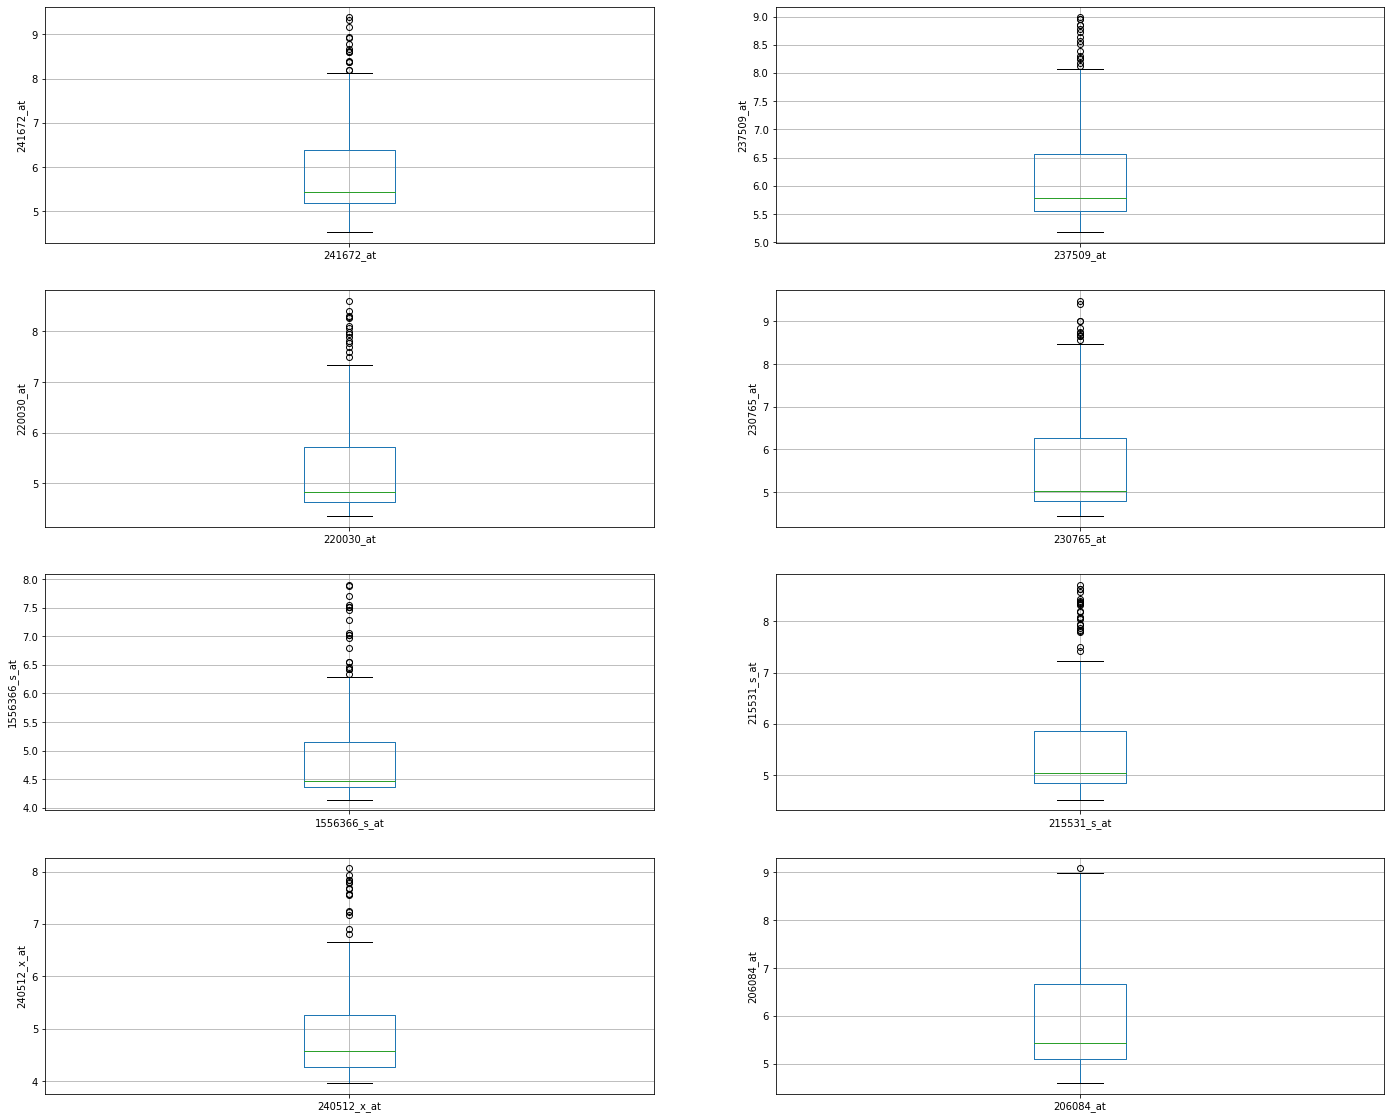

In [ ]:
# draw boxplots to visualize outliers

plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df.boxplot(column='241672_at')
fig.set_title('')
fig.set_ylabel('241672_at')


plt.subplot(4, 2, 2)
fig = df.boxplot(column='237509_at')
fig.set_title('')
fig.set_ylabel('237509_at')


plt.subplot(4, 2, 3)
fig = df.boxplot(column='220030_at')
fig.set_title('')
fig.set_ylabel('220030_at')


plt.subplot(4, 2, 4)
fig = df.boxplot(column='230765_at')
fig.set_title('')
fig.set_ylabel('230765_at')


plt.subplot(4, 2, 5)
fig = df.boxplot(column='1556366_s_at')
fig.set_title('')
fig.set_ylabel('1556366_s_at')


plt.subplot(4, 2, 6)
fig = df.boxplot(column='215531_s_at')
fig.set_title('')
fig.set_ylabel('215531_s_at')


plt.subplot(4, 2, 7)
fig = df.boxplot(column='240512_x_at')
fig.set_title('')
fig.set_ylabel('240512_x_at')


plt.subplot(4, 2, 8)
fig = df.boxplot(column='206084_at')
fig.set_title('')
fig.set_ylabel('206084_at')

Text(0, 0.5, 'number of samples')

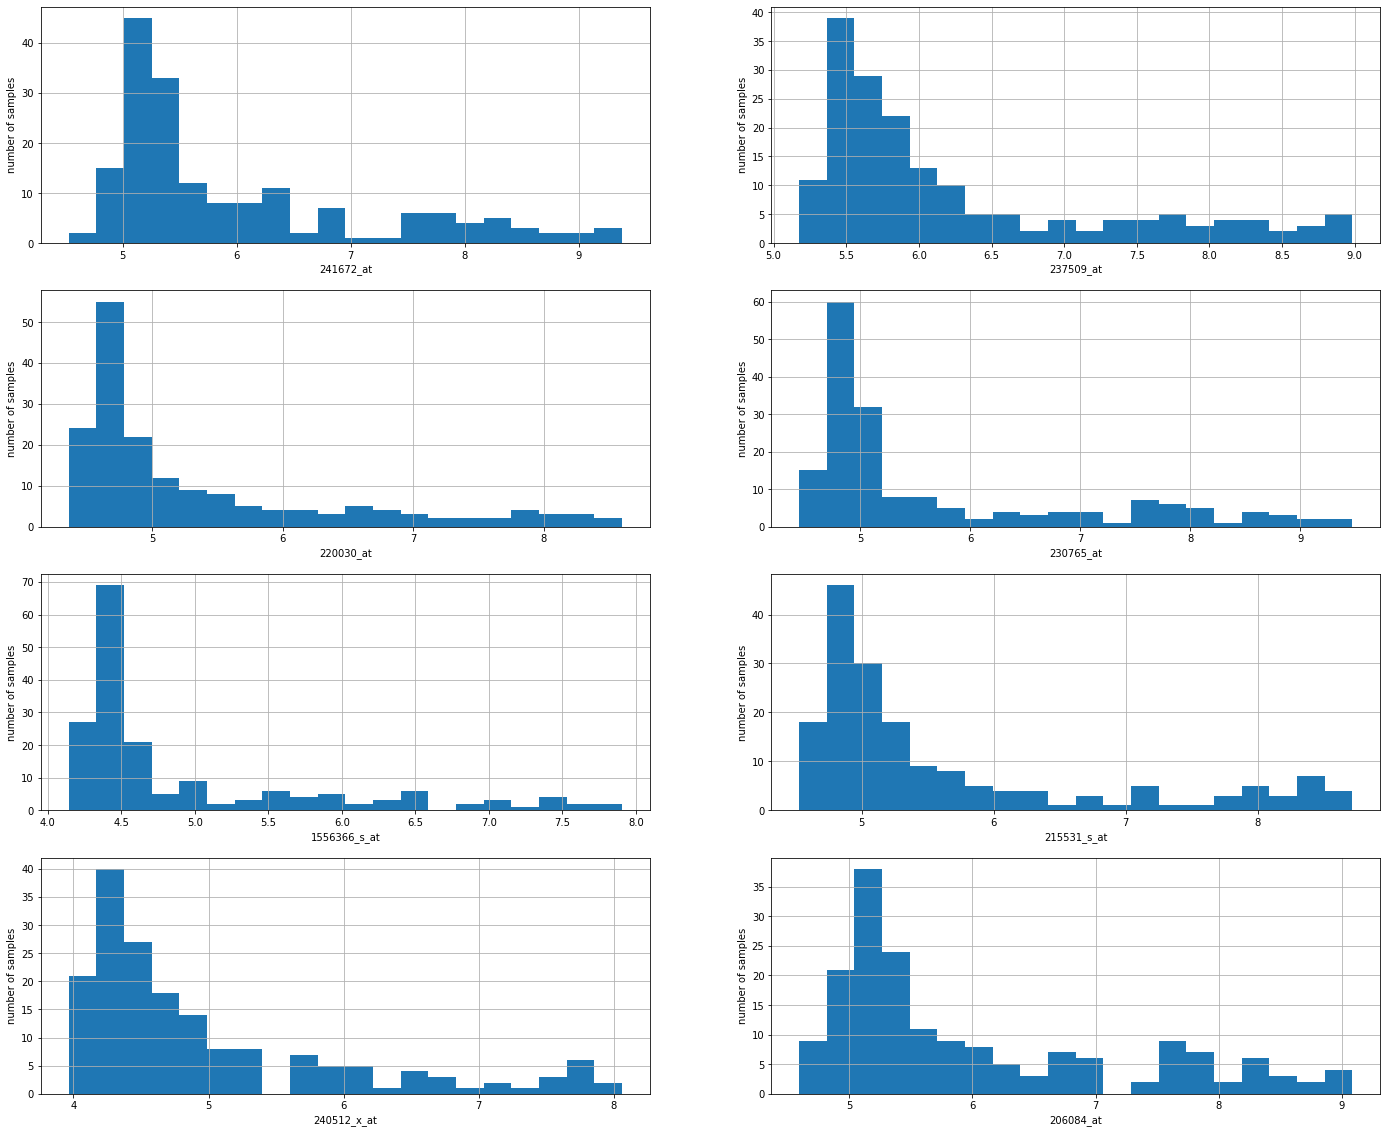

In [ ]:
# plot histogram to check distribution


plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df['241672_at'].hist(bins=20)
fig.set_xlabel('241672_at')
fig.set_ylabel('number of samples')


plt.subplot(4, 2, 2)
fig = df['237509_at'].hist(bins=20)
fig.set_xlabel('237509_at')
fig.set_ylabel('number of samples')


plt.subplot(4, 2, 3)
fig = df['220030_at'].hist(bins=20)
fig.set_xlabel('220030_at')
fig.set_ylabel('number of samples')



plt.subplot(4, 2, 4)
fig = df['230765_at'].hist(bins=20)
fig.set_xlabel('230765_at')
fig.set_ylabel('number of samples')



plt.subplot(4, 2, 5)
fig = df['1556366_s_at'].hist(bins=20)
fig.set_xlabel('1556366_s_at')
fig.set_ylabel('number of samples')



plt.subplot(4, 2, 6)
fig = df['215531_s_at'].hist(bins=20)
fig.set_xlabel('215531_s_at')
fig.set_ylabel('number of samples')



plt.subplot(4, 2, 7)
fig = df['240512_x_at'].hist(bins=20)
fig.set_xlabel('240512_x_at')
fig.set_ylabel('number of samples')


plt.subplot(4, 2, 8)
fig = df['206084_at'].hist(bins=20)
fig.set_xlabel('206084_at')
fig.set_ylabel('number of samples')

In [ ]:
X = df.drop(['disease:ch1', 'index'], axis=1)

y = df['disease:ch1']

In [ ]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 0)

In [ ]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((128, 775), (128, 775))

In [ ]:
cols = X_train.columns

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_train.describe()

,230765_at,241672_at,240512_x_at,235591_at,220294_at,207307_at,1557107_at,210650_s_at,200665_s_at,231804_at,...,1558009_at,204298_s_at,236028_at,206201_s_at,225275_at,229778_at,231911_at,201744_s_at,1565809_x_at,1555778_a_at
count,1.280000e+02,1.280000e+02,1.280000e+02,1.280000e+02,1.280000e+02,1.280000e+02,1.280000e+02,1.280000e+02,1.280000e+02,1.280000e+02,...,1.280000e+02,1.280000e+02,1.280000e+02,1.280000e+02,1.280000e+02,1.280000e+02,1.280000e+02,1.280000e+02,1.280000e+02,1.280000e+02
mean,4.406198e-16,-8.743006e-16,-7.632783e-16,-3.053113e-16,2.151057e-16,-1.387779e-16,9.575674e-16,-6.106227e-16,-1.769418e-16,3.816392e-16,...,1.734723e-16,1.283695e-16,3.330669e-16,-1.474515e-16,-6.591949e-16,-8.326673e-17,1.387779e-17,1.249001e-16,5.551115e-17,1.804112e-16
std,1.003929e+00,1.003929e+00,1.003929e+00,1.003929e+00,1.003929e+00,1.003929e+00,1.003929e+00,1.003929e+00,1.003929e+00,1.003929e+00,...,1.003929e+00,1.003929e+00,1.003929e+00,1.003929e+00,1.003929e+00,1.003929e+00,1.003929e+00,1.003929e+00,1.003929e+00,1.003929e+00
min,-6.929909e-01,-8.790636e-01,-7.740461e-01,-8.608133e-01,-8.734195e-01,-9.092958e-01,-1.039231e+00,-9.175196e-01,-2.763495e+00,-8.571845e-01,...,-1.838974e+00,-1.277235e+00,-1.333048e+00,-1.116233e+00,-2.767434e+00,-1.489399e+00,-1.668937e+00,-1.556673e+00,-1.262798e+00,-1.069361e+00
25%,-5.675516e-01,-6.183039e-01,-5.863664e-01,-6.537372e-01,-5.911738e-01,-5.961310e-01,-6.555923e-01,-6.544309e-01,-1.294724e-01,-6.231538e-01,...,-8.060429e-01,-1.016151e+00,-1.023127e+00,-9.536479e-01,-6.459643e-01,-9.504837e-01,-9.949973e-01,-8.395207e-01,-1.033674e+00,-8.900292e-01
50%,-4.778984e-01,-4.807981e-01,-4.476822e-01,-4.935886e-01,-4.652143e-01,-4.535338e-01,-4.960426e-01,-5.067215e-01,3.810679e-01,-4.842119e-01,...,1.343192e-01,-2.946787e-03,-6.092489e-02,-2.660022e-01,2.096761e-01,-9.636037e-02,9.039111e-02,-1.749364e-01,-3.483342e-02,-4.600316e-01
75%,-3.823916e-02,5.757374e-02,4.289414e-02,3.624361e-01,7.303154e-02,9.723178e-02,3.094287e-01,2.433527e-01,6.246799e-01,2.259156e-01,...,7.865620e-01,7.144895e-01,6.524126e-01,9.526846e-01,8.368354e-01,8.925592e-01,9.273892e-01,6.169994e-01,9.097382e-01,9.242654e-01
max,3.317256e+00,3.294964e+00,3.258622e+00,3.197662e+00,3.337190e+00,3.180706e+00,3.185255e+00,3.148514e+00,1.182932e+00,3.396580e+00,...,1.966602e+00,3.045307e+00,2.034974e+00,2.380136e+00,1.492848e+00,2.225787e+00,1.704354e+00,2.409662e+00,1.905845e+00,2.163140e+00


In [ ]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [ ]:
# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc=SVC() 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.9531


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [ ]:
# instantiate classifier with rbf kernel and C=100
svc=SVC(C=100.0) 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=100.0 : 0.9922


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


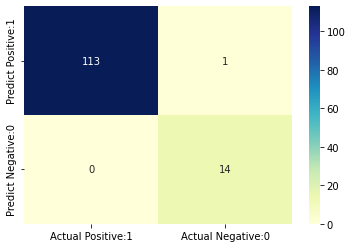

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
# instantiate classifier with rbf kernel and C=1000
svc=SVC(C=1000.0) 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=1000.0 : 0.9922


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [ ]:
# instantiate classifier with linear kernel and C=1.0
linear_svc=SVC(kernel='linear', C=1.0) 


# fit classifier to training set
linear_svc.fit(X_train,y_train)


# make predictions on test set
y_pred_test=linear_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with linear kernel and C=1.0 : 0.9922


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [ ]:
# instantiate classifier with linear kernel and C=100.0
linear_svc100=SVC(kernel='linear', C=100.0) 


# fit classifier to training set
linear_svc100.fit(X_train, y_train)


# make predictions on test set
y_pred=linear_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=100.0 : 0.9922


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


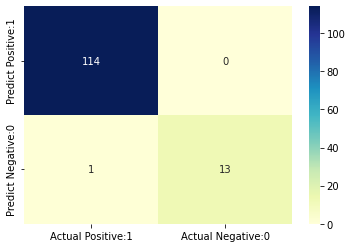

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
# instantiate classifier with linear kernel and C=1000.0
linear_svc1000=SVC(kernel='linear', C=1000.0) 


# fit classifier to training set
linear_svc1000.fit(X_train, y_train)


# make predictions on test set
y_pred=linear_svc1000.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=1000.0 : 0.9922


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [ ]:
y_pred_train = linear_svc.predict(X_train)

y_pred_train

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 1.0000


In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(linear_svc.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(linear_svc.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.9922


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [ ]:
# check class distribution in test set

y_test.value_counts()

0    114
1     14
Name: disease:ch1, dtype: int64

In [ ]:
# check null accuracy score

null_accuracy = (31/(31+5))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.8611


In [ ]:
# instantiate classifier with polynomial kernel and C=1.0
poly_svc=SVC(kernel='poly', C=1.0) 


# fit classifier to training set
poly_svc.fit(X_train,y_train)


# make predictions on test set
y_pred=poly_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.9844


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [ ]:
# instantiate classifier with polynomial kernel and C=100.0
poly_svc100=SVC(kernel='poly', C=100.0) 


# fit classifier to training set
poly_svc100.fit(X_train, y_train)


# make predictions on test set
y_pred=poly_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.9844


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


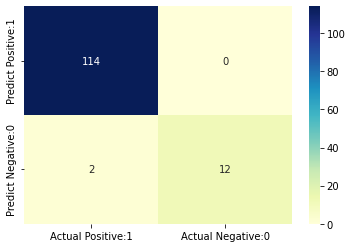

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
# instantiate classifier with sigmoid kernel and C=1.0
sigmoid_svc=SVC(kernel='sigmoid', C=1.0) 


# fit classifier to training set
sigmoid_svc.fit(X_train,y_train)


# make predictions on test set
y_pred=sigmoid_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=1.0 : 0.8906


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [ ]:
# instantiate classifier with sigmoid kernel and C=100.0
sigmoid_svc100=SVC(kernel='sigmoid', C=100.0) 


# fit classifier to training set
sigmoid_svc100.fit(X_train,y_train)


# make predictions on test set
y_pred=sigmoid_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=100.0 : 0.9297


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


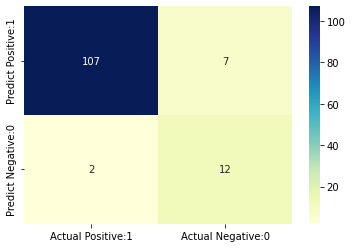

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[114   0]
 [  1  13]]

True Positives(TP) =  114

True Negatives(TN) =  13

False Positives(FP) =  0

False Negatives(FN) =  1


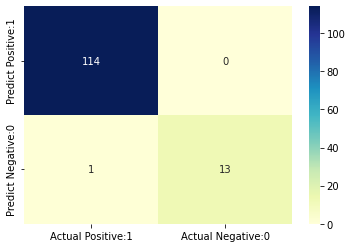

In [ ]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        73
           1       0.94      1.00      0.97        15

    accuracy                           0.99        88
   macro avg       0.97      0.99      0.98        88
weighted avg       0.99      0.99      0.99        88



In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [ ]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9886


In [ ]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0114


In [ ]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9863


In [ ]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 1.0000


In [ ]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 1.0000


In [ ]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.0625


In [ ]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.9375


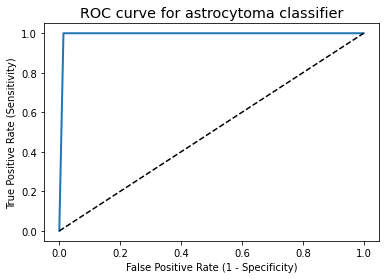

In [ ]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for astrocytoma classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [ ]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred_test)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9932


In [ ]:
# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(linear_svc, X_train, y_train, cv=10, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.9857


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.

In [ ]:
from sklearn.model_selection import KFold


kfold=KFold(n_splits=5, shuffle=True, random_state=0)


linear_svc=SVC(kernel='linear')


linear_scores = cross_val_score(linear_svc, X, y, cv=kfold)

In [ ]:
# print cross-validation scores with linear kernel

print('Stratified cross-validation scores with linear kernel:\n\n{}'.format(linear_scores))

Stratified cross-validation scores with linear kernel:

[0.97222222 0.97142857 0.97142857 0.97142857 0.94285714]


In [ ]:
# print average cross-validation score with linear kernel

print('Average stratified cross-validation score with linear kernel:{:.4f}'.format(linear_scores.mean()))

Average stratified cross-validation score with linear kernel:0.9659


In [ ]:
rbf_svc=SVC(kernel='rbf')


rbf_scores = cross_val_score(rbf_svc, X, y, cv=kfold)

In [ ]:
# print cross-validation scores with rbf kernel

print('Stratified Cross-validation scores with rbf kernel:\n\n{}'.format(rbf_scores))

Stratified Cross-validation scores with rbf kernel:

[0.97222222 0.97142857 1.         1.         0.94285714]


In [ ]:
# print average cross-validation score with rbf kernel

print('Average stratified cross-validation score with rbf kernel:{:.4f}'.format(rbf_scores.mean()))

Average stratified cross-validation score with rbf kernel:0.9773


In [ ]:
# import GridSearchCV
from sklearn.model_selection import GridSearchCV


# import SVC classifier
from sklearn.svm import SVC


# instantiate classifier with default hyperparameters with kernel=rbf, C=1.0 and gamma=auto
svc=SVC() 



# declare parameters for hyperparameter tuning
parameters = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
               {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
               {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05]} 
              ]




grid_search = GridSearchCV(estimator = svc,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'degree': [2, 3, 4],
                          'gamma': [0.01, 0.02, 0.03, 0.04, 0.05],
                          'kernel': ['poly']}],
             scoring='accuracy')

In [ ]:
# examine the best model


# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))


# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))


# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.9771


Parameters that give the best results : 

 {'C': 1, 'degree': 2, 'gamma': 0.01, 'kernel': 'poly'}


Estimator that was chosen by the search : 

 SVC(C=1, degree=2, gamma=0.01, kernel='poly')


In [ ]:
# calculate GridSearch CV score on test set

print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV score on test set: 0.9773


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
